<a href="https://colab.research.google.com/github/sooyoung-wind/python-practice/blob/main/ML_2day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [358]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanic/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanic/gender_submission.csv')

In [359]:
# 1. 결측치 체크
train.info()
train[train.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [360]:
# 2. dtpey이 object인 column 찾기
train.loc[:,train.dtypes == 'object']


,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [361]:
train.columns[train.dtypes == "object"]

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

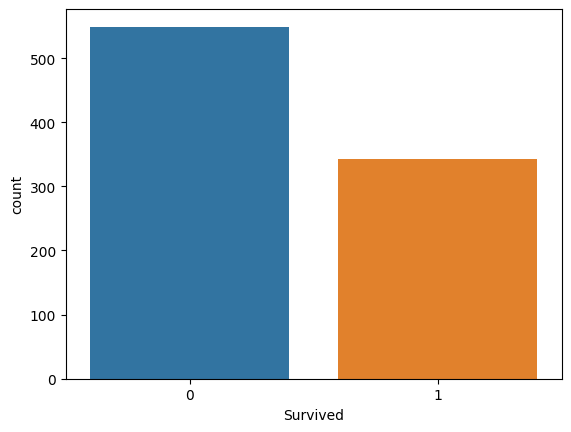

0    549
1    342
Name: Survived, dtype: int64

In [362]:
# 3. target value distribution 체크
sns.countplot(data = train, x='Survived')
plt.show()

train.Survived.value_counts()

In [363]:
# feautre enginerring : 강사님 스타일~~
# 1. 결측치 처리 => 1. Cabin column의 결측치 여부가 Survived에 영향이 있는가?
train.loc[train.Cabin.isnull(), 'Survived'].mean(), train.loc[train.Cabin.notnull(), 'Survived'].mean()

(0.29985443959243085, 0.6666666666666666)

In [364]:
# 2. 영향이 있는다고 보이니, Cabin값이 있으면 1, 없으면 0 값을 가지는 is_Cabin이라는 column을 만들어봅시다.
train['is_Cabin'] = 'None'
train.loc[train.Cabin.isnull(), 'is_Cabin'] = 0
train.loc[train.Cabin.notnull(), 'is_Cabin'] = 1
# train['is_Cabin'] = train.Cabin.notnull() * 1

In [365]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [366]:
# 3. SibSp , Parch 합치기 => FamilySize
train['FamilySize'] = train['SibSp'] + train.Parch
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_Cabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [367]:
# 4. drop columns
train = train.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Cabin', 'Ticket'])
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,is_Cabin,FamilySize
0,0,3,male,22.0,7.2500,S,0,1
1,1,1,female,38.0,71.2833,C,1,1
2,1,3,female,26.0,7.9250,S,0,0
3,1,1,female,35.0,53.1000,S,1,1
4,0,3,male,35.0,8.0500,S,0,0


In [368]:
train[train.isnull().any(axis = 1)]

,Survived,Pclass,Sex,Age,Fare,Embarked,is_Cabin,FamilySize
5,0,3,male,NaN,8.4583,Q,0,0
17,1,2,male,NaN,13.0000,S,0,0
19,1,3,female,NaN,7.2250,C,0,0
26,0,3,male,NaN,7.2250,C,0,0
28,1,3,female,NaN,7.8792,Q,0,0
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,7.2292,C,0,0
863,0,3,female,NaN,69.5500,S,0,10
868,0,3,male,NaN,9.5000,S,0,0
878,0,3,male,NaN,7.8958,S,0,0


In [369]:
# 5. Age column
train.Age = train.Age.fillna(train.Age.median())

In [370]:
# 6. dropna
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    object 
 3   Age         889 non-null    float64
 4   Fare        889 non-null    float64
 5   Embarked    889 non-null    object 
 6   is_Cabin    889 non-null    object 
 7   FamilySize  889 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.5+ KB


In [371]:
### 7. Encoding categoricala feature

### 1) oridinal encoding
### 카테고리의 순서대로 숫자로 변환
# train.loc[:,'Sex'] = pd.factorize(train.Sex, sort=True)[0] # sort를 사용하면 알파벳 순서대로 숫자를 부여함

### map을 사용하여 카테고리 숫자를 부여하는 방법
encoding_map = {'male' : 1, 'female' : 200}
train.Sex = train.Sex.map(encoding_map)

<ipython-input-371-dc2ee41be4e0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Sex = train.Sex.map(encoding_map)


In [372]:
# 2) one-hot encoding
train = pd.get_dummies(data=train, columns=['Embarked'])
train.head()


,Survived,Pclass,Sex,Age,Fare,is_Cabin,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,0,1,0,0,1
1,1,1,200,38.0,71.2833,1,1,1,0,0
2,1,3,200,26.0,7.9250,0,0,0,0,1
3,1,1,200,35.0,53.1000,1,1,0,0,1
4,0,3,1,35.0,8.0500,0,0,0,0,1


In [373]:
# data setting for training
from sklearn.model_selection import train_test_split

x = train.drop(columns=['Survived']) # feature vector
y = train.Survived # target value

# 트테트테
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=9234)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(711, 9) (178, 9) (711,) (178,)


In [374]:
# training(= fitting)
# sklearn에서 학습하는 방법
# 1. 사용할 함수를 불러온다.
# 2. 해당 함수를 선언한다.
# 3. fit()

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler



In [375]:
from sklearn.linear_model import LinearRegression, LogisticRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

lreg = LogisticRegression(random_state=9234, solver='liblinear', max_iter=300)
lreg.fit(X_train,y_train)

LogisticRegression(max_iter=300, random_state=9234, solver='liblinear')

In [376]:
# 회귀 성능 비교
from sklearn.metrics import mean_squared_error, accuracy_score # MSE

print("Linear Regression MSE : %.4f" % mean_squared_error(y_train, reg.predict(X_train)))
lreg.predict(X_train)
print("Logistic Regression MSE : %.4f" % mean_squared_error(y_train, lreg.predict_proba(X_train)[:,1]))
lreg.predict_proba(X_train)

print('Train ACC : %.4f' % accuracy_score(y_train, lreg.predict(X_train)))
print('Validation ACC : %.4f' % accuracy_score(y_val, lreg.predict(X_val)))

Linear Regression MSE : 0.1460
Logistic Regression MSE : 0.1433
Train ACC : 0.7975
Validation ACC : 0.8315


In [377]:
# TO-DO : test 데이터를 X_test로 가공해서 lreg.predict(X_test)가 에러가 나지 않고 출력이 되게끔 만드세요!
#lreg.predict(X_test)

In [378]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [379]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [380]:
test['is_Cabin'] = test.Cabin.notnull() * 1

In [381]:
test = test.drop(columns=['Cabin'])

In [382]:
test['FamilySize'] = test.SibSp + test.Parch

In [383]:
# Age fill to median
test.Age = test.Age.fillna(test.Age.median())

# Pclass 3 -> Fare median input
test.Fare = test.Fare.fillna(test.loc[test.Pclass == 3, 'Fare'].median())

In [384]:
test = test.dropna()

In [385]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  is_Cabin     418 non-null    int64  
 11  FamilySize   418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


In [386]:
test.Sex = test.Sex.map(encoding_map)

In [387]:
test = pd.get_dummies(data=test, columns=['Embarked'])

In [388]:
test = test.drop(columns=['PassengerId', 'Name', "SibSp", 'Parch', 'Ticket'])

In [389]:
test.head()

,Pclass,Sex,Age,Fare,is_Cabin,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,7.8292,0,0,0,1,0
1,3,200,47.0,7.0000,0,1,0,0,1
2,2,1,62.0,9.6875,0,0,0,1,0
3,3,1,27.0,8.6625,0,0,0,0,1
4,3,200,22.0,12.2875,0,2,0,0,1


In [390]:
test.shape

(418, 9)

In [391]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   is_Cabin    418 non-null    int64  
 5   FamilySize  418 non-null    int64  
 6   Embarked_C  418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [392]:
submission.shape

(418, 2)

In [393]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [394]:
predict_dataset = lreg.predict(X=test)

In [397]:
# predict_dataset.to_csv('submission.csv', index=False)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,